# K-Means Clustering
___

**K-means clustering** is a simple and popular unsupervised machine learning algorithm.\
This algorithm is used to divide unlabeled data into groups.\
(Especially, we divide our data into **K** clusters.)

## How is it done?

Well, pretty simple.\
For example, let's imagine we have some **data points** and we need to **divide** them into **k clusters**.\
\
**1)** Firstly, each cluster should have its own **centroid**. For **first centroids** we can take **random points** from our data\
**2)** Then, for **each data point** we calculate the **Euclidian distance** to all of our **k centroids**.\
*(By the Euclidian distance I mean: $d = \sqrt{(x2-x1)^2 + (y2-y1)^2 + ... + (n2 - n1)^2}$.\
And by coordinates I mean any numerical data that have different values and by which we can somehow say about its belonging to certain, unique  group.)*\
**3)** Comparing the **distances** to the centroids, we take **the least one** and assume that the point **belongs** to the cluster with this, certain centroid.\
**4)** When we **divided** our all points into clusters, we take the **mean of 'coordinates'** of all data points in **every cluster** and assume that these are our **new centroids**.\
**5)** Then we can repeat it again and again untill there is **no change** in coordinates of the centroids. And that is it!\
**6)** To know what k we should take, we should run some models where $k = 1, 2, 3, ..., n$  to get the inertia of the model. All there is left to do is to plot a graph ($x$ -> $1,2,3,..., n$ ; $y$ -> inertia) and use "The Rule of an Elbow": on which point the graph is similar to an elbow, that point we should take.\
Simply saying, we should take the point (k number of clusters) where on the graph:\
*A) Before that point we have a huge change of inertia\
 B) After that point the inertia doesn't change much*

## Application of K-Means

In [17]:
#importing libraries
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt
%matplotlib inline

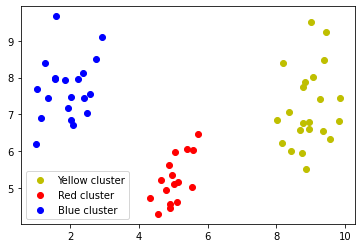

In [18]:
#Creating our hypothetical clusters with k = 3

start_point1 = [np.random.randint(8, 11), np.random.randint(5, 10)]
start_point2 = [np.random.randint(4, 7), np.random.randint(5, 10)]
start_point3 = [np.random.randint(1, 3), np.random.randint(5, 10)]

#Creating data points
cluster1 = [[start_point1[0] + np.random.randn()/2, start_point1[1] + np.random.randn()] for i in range(np.random.randint(15,25))]
cluster1 = pd.DataFrame(data = cluster1, columns = ['x', 'y'])

cluster2 = [[start_point2[0] + np.random.randn()/2, start_point2[1] + np.random.randn()] for i in range(np.random.randint(15,25))]
cluster2 = pd.DataFrame(data = cluster2, columns = ['x', 'y'])

cluster3 = [[start_point3[0] + np.random.randn()/2, start_point3[1] + np.random.randn()] for i in range(np.random.randint(15,25))]
cluster3 = pd.DataFrame(data = cluster3, columns = ['x', 'y'])

#plotting our graph: cluster points

plt.scatter(cluster1['x'], cluster1['y'], color = 'y', label = 'Yellow cluster')
plt.scatter(cluster2['x'], cluster2['y'], color = 'r', label = 'Red cluster')
plt.scatter(cluster3['x'], cluster3['y'], color = 'b', label = 'Blue cluster')

plt.legend()

But now let's plot it in a different way: so we don't know what are the clusters

In [19]:
#Creating a dataset from points
data = pd.DataFrame(columns = ['x', 'y'])
data['x'] = pd.concat([cluster1['x'], cluster2['x'], cluster3['x']], ignore_index = True)
data['y'] = pd.concat([cluster1['y'], cluster2['y'], cluster3['y']], ignore_index = True)
data.head(10)

,x,y
0,8.835697,7.869800
1,9.570828,6.330668
2,8.024402,6.837615
3,9.462466,9.249034
4,8.680856,6.582748
5,8.951427,6.618216
6,8.757939,5.964318
7,8.776854,7.755875
8,9.865119,7.453920
9,8.873090,5.521460


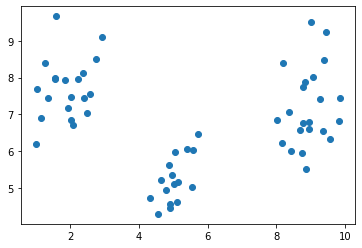

In [20]:
plt.scatter(data['x'], data['y'])

In [21]:
#importing scikitlearn's K-means
from sklearn.cluster import KMeans

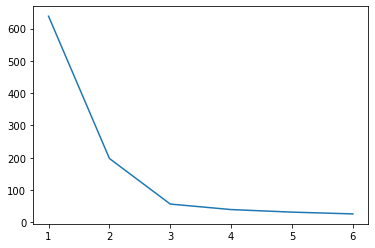

In [22]:
#We look at inertia with cluster's number from 1 to 6
inertia = []
for i in range(1, 7):
    km = KMeans(n_clusters=i)
    km.fit(data)
    inertia.append(km.inertia_)
plt.plot([i for i in range(1,7)], inertia)

Look, by "The Rule of an Elbow" we exactly know, that we should take k = 3.\
Let's do it one more time and plot our KMeans graph with predicted clusters!

In [23]:
#Fitting our model, creating the column 'cluster' in data 
kmeans = KMeans(n_clusters = 3)
kmeans.fit(data)
data['cluster'] = kmeans.labels_
data.head(10)

,x,y,cluster
0,8.835697,7.869800,0
1,9.570828,6.330668,0
2,8.024402,6.837615,0
3,9.462466,9.249034,0
4,8.680856,6.582748,0
5,8.951427,6.618216,0
6,8.757939,5.964318,0
7,8.776854,7.755875,0
8,9.865119,7.453920,0
9,8.873090,5.521460,0


In [24]:
#getting predicted centroids
centroids = kmeans.cluster_centers_
print(centroids)
centroids = pd.DataFrame(data = {'x': [centroids[i,0] for i in range(3)], 
                                 'y': [centroids[i,1] for i in range(3)], })
centroids

[[8.93895833 7.19250454]
 [1.90351295 7.70567765]
 [5.02751336 5.23179524]]


,x,y
0,8.938958,7.192505
1,1.903513,7.705678
2,5.027513,5.231795


In [25]:
#Make clusters from data
cluster1_p = data[data['cluster'] == 0].drop('cluster', axis = 1)
cluster2_p = data[data['cluster'] == 1].drop('cluster', axis = 1)
cluster3_p = data[data['cluster'] == 2].drop('cluster', axis = 1)

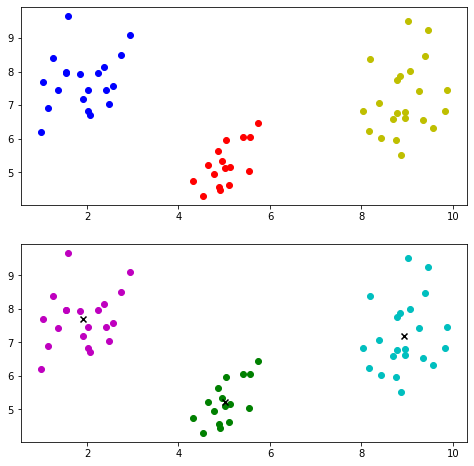

In [26]:
#Creating two subplots: first for actual data, second for predicted
fig, [ActualAx, PredictAx] = plt.subplots(2)
fig.set_size_inches(8, 8)


#Predicted clusters 
PredictAx.scatter(cluster1_p['x'], cluster1_p['y'], color = 'c')
PredictAx.scatter(cluster2_p['x'], cluster2_p['y'], color = 'm')
PredictAx.scatter(cluster3_p['x'], cluster3_p['y'], color = 'g')

#Centroids
PredictAx.scatter(centroids['x'], centroids['y'], color = 'k', marker = 'x')

#Actual clusters
ActualAx.scatter(cluster1['x'], cluster1['y'], color = 'y')
ActualAx.scatter(cluster2['x'], cluster2['y'], color = 'r')
ActualAx.scatter(cluster3['x'], cluster3['y'], color = 'b')

And that is how the K-Means algorithm works!